# Mikhail Gulyi

# Covid-19 CDC Data Analysis

## 1- Abstract
This report presents an exploratory data analysis performed on data of some COVID-19 patients in the United States. The data was obtained from the Center for Disease Control and Prevention CDC. The goal of our analysis is to demonstrate the relationships between the patients' mortality rate and the following factors: age, race & ethnicity, sex, having medical conditions, patient hospitalization, and patient admission to the intensive care unit ICU. In order to exclude the effects of the newly innovated vaccines and the new strains of SARS-CoV-2, this report uses only the confirmed cases of the data that have been captured during the period [01/01/2020, 02/12/2020]. The report concludes that all the mentioned factors have significant effects on the patients' mortality rate.

## 2- Introduction
The Center for Disease Control and Prevention CDC shares important parts of a database called "COVID-19 case surveillance" with public. The part that will be used in this report is called __COVID-19 Case Surveillance Public Use Data__. 
The mentioned part contains 11 data elements (i.e. columns or features). 
The database is updated monthly, the 11 data elements of our data are:

|Column Name |Description |Type
|-----|-----|----- 
|cdc_report_dt |Date case was first reported to the CDC. Calculated date. This date was populated using the date at which a case record was first submitted to the database. If missing, then the report date entered on the case report form was used. If missing, then the date at which the case first appeared in the database was used. If none available, then left blank. |Date & Time
|pos_spec_dt|Date of first positive specimen collection (Case Report Form)|Date & Time
|onset_dt|Symptom onset date, if symptomatic (Case Report Form)|Date & Time
|current_status|Case Status (Case Report Form: What is the current status of this person?) -- Values: Laboratory-confirmed case; Probable case;|Plain Text
|sex|Sex (Case Report Form): Male; Female; Unknown; Other; Missing; NA|Plain Text
|age_group|Age Group: 0 - 9 Years; 10 - 19 Years; 20 - 39 Years; 40 - 49 Years; 50 - 59 Years; 60 - 69 Years; 70 - 79 Years; 80 + Years;Unknown, Missing; NA; The age group categorizations were populated using the age value that was reported on the case report form. Date of birth was used to fill in missing/unknown age values using the difference in time between date of birth and onset date.|Plain Text
|race_ethnicity_combined |Race and ethnicity (combined): American Indian/Alaska Native, Non-Hispanic; Asian, Non-Hispanic; Black, Non-Hispanic; Multiple/Other, Non-Hispanic; Native Hawaiian/Other Pacific Islander, Non-Hispanic; White, Non-Hispanic; Hispanic/Latino; Unknown; Missing; NA. If more than race was reported, race was categorized into multiple/other races.|Plain Text
|hosp_yn|Hospitalization status (Case Report Form: Was the patient hospitalized?) -- Values: Yes; No; Unknown; Missing;|Plain Text
|icu_yn|ICU admission status (Case Report Form: Was the patient admitted to an intensive care unit (ICU)?) -- Values: Yes; No; Unknown; Missing;|Plain Text
|death_yn|Death status (Case Report Form: Did the patient die as a result of this illness?) -- Values: Yes; No; Unknown; Missing;|Plain Text
|medcond_yn|Presence of underlying comorbidity or disease (Case Report Form: Pre-existing medical conditions?) -- Values: Yes; No; Unknown; Missing;|Plain Text

Source: [COVID-19 Case Surveillance Public Use Data](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf).

The goal of this report is, __for the confirmed cases__, to demonstrate the relationships between the "non-datetime" data elements of the data set and the __death_yn__ data element. 
As mentioned before, in order to avoid the effects of the invented vaccines and the new strains of SARS-CoV-2 on the relationships that are being studied, this report does not take into account the whole available data in  __COVID-19 Case Surveillance Public Use Data__ data set, but considers only the data of the period __[01/01/2020, 02/12/2020 ]__. 

## 3- Importing The Data

The downloaded data contains about 8.4M rows and 11 columns.

importing the data:

In [1]:
import pandas as pd
df = pd.read_csv('data/COVID-19_Case_Surveillance_Public_Use_Data.csv')


C:\Users\mikhail\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.shape


(8405079, 11)

In [3]:
print(df.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cdc_report_dt                  8405079 non-null  object
 1   pos_spec_dt                    2870789 non-null  object
 2   onset_dt                       4395957 non-null  object
 3   current_status                 8405079 non-null  object
 4   sex                            8405061 non-null  object
 5   age_group                      8404990 non-null  object
 6   Race and ethnicity (combined)  8405072 non-null  object
 7   hosp_yn                        8405079 non-null  object
 8   icu_yn                         8405079 non-null  object
 9   death_yn                       8405079 non-null  object
 10  medcond_yn                     8405079 non-null  object
dtypes: object(11)
memory usage: 705.4+ MB
None


In [4]:
# number of unique values in each column
df.nunique()


cdc_report_dt                    321
pos_spec_dt                      313
onset_dt                         338
current_status                     2
sex                                5
age_group                         10
Race and ethnicity (combined)      9
hosp_yn                            4
icu_yn                             4
death_yn                           4
medcond_yn                         4
dtype: int64

In [5]:
df.head()


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


## 4- Data Cleaning
First of all, we have to keep only the laboratory confirmed cases, and delete all the other cases:

In [6]:
# ignore all the rows that do not contain "Laboratory-confirmed case" value in the column "current_status"
df = df.loc[df['current_status'] == 'Laboratory-confirmed case']
print(df.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7910118 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cdc_report_dt                  7910118 non-null  object
 1   pos_spec_dt                    2704693 non-null  object
 2   onset_dt                       4194612 non-null  object
 3   current_status                 7910118 non-null  object
 4   sex                            7910101 non-null  object
 5   age_group                      7910037 non-null  object
 6   Race and ethnicity (combined)  7910111 non-null  object
 7   hosp_yn                        7910118 non-null  object
 8   icu_yn                         7910118 non-null  object
 9   death_yn                       7910118 non-null  object
 10  medcond_yn                     7910118 non-null  object
dtypes: object(11)
memory usage: 724.2+ MB
None


From the results above, we can see that we have alot of confirmed cases without a first positive specimen date. Such a data could be inaccurate,
so let us ignore this data

In [7]:
# ignore all the rows that contain a null value in the column "pos_spec_dt"
df = df[df['pos_spec_dt'].notna()]
print(df.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704693 entries, 0 to 7494730
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cdc_report_dt                  2704693 non-null  object
 1   pos_spec_dt                    2704693 non-null  object
 2   onset_dt                       1359098 non-null  object
 3   current_status                 2704693 non-null  object
 4   sex                            2704683 non-null  object
 5   age_group                      2704639 non-null  object
 6   Race and ethnicity (combined)  2704687 non-null  object
 7   hosp_yn                        2704693 non-null  object
 8   icu_yn                         2704693 non-null  object
 9   death_yn                       2704693 non-null  object
 10  medcond_yn                     2704693 non-null  object
dtypes: object(11)
memory usage: 247.6+ MB
None


Now our data look better, but we need to ignore all the date columns, and the current_status column as we are not concerned about them anymore:

In [9]:
# drop the first four columns.
df.drop(df.columns[[0, 1, 2, 3]], axis=1, inplace=True)
print(df.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704693 entries, 0 to 7494730
Data columns (total 7 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   sex                            2704683 non-null  object
 1   age_group                      2704639 non-null  object
 2   Race and ethnicity (combined)  2704687 non-null  object
 3   hosp_yn                        2704693 non-null  object
 4   icu_yn                         2704693 non-null  object
 5   death_yn                       2704693 non-null  object
 6   medcond_yn                     2704693 non-null  object
dtypes: object(7)
memory usage: 165.1+ MB
None


From the results above, we can notice that almost all the remaining data cells don't contain null values, so we can remove all the rows that contain null values.

In [10]:
df.dropna(inplace=True)
print(df.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704639 entries, 0 to 7494730
Data columns (total 7 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   sex                            2704639 non-null  object
 1   age_group                      2704639 non-null  object
 2   Race and ethnicity (combined)  2704639 non-null  object
 3   hosp_yn                        2704639 non-null  object
 4   icu_yn                         2704639 non-null  object
 5   death_yn                       2704639 non-null  object
 6   medcond_yn                     2704639 non-null  object
dtypes: object(7)
memory usage: 165.1+ MB
None


From the results above, the data seems to be consistent, but we still have some issues as all the remaining rows still contain values like "Unknown" or "Missing". And as those values might be useless for our purpose, we can delete them. 

In [11]:
# ignore all the rows that contian "Unknown" or "Missing value in the column "sex"
df = df.loc[df['sex'] != 'Unknown']
df = df.loc[df['sex'] != 'Missing']
# ignore all the rows that contian "Unknown" or "Missing value in the column "age_group"
df = df.loc[df['age_group'] != 'Unknown']
df = df.loc[df['age_group'] != 'Missing']
# ignore all the rows that contian "Unknown" or "Missing" value in the column "Race and ethnicity (combined)"
df = df.loc[df['Race and ethnicity (combined)'] != 'Unknown']
df = df.loc[df['Race and ethnicity (combined)'] != 'Missing']
# ignore all the rows that contian "Unknown" or "Missing" value in the column "hosp_yn"
df = df.loc[df['hosp_yn'] != 'Unknown']
df = df.loc[df['hosp_yn'] != 'Missing']
# ignore all the rows that contian "Unknown" or "Missing" value in the column "icu_yn"
df = df.loc[df['icu_yn'] != 'Unknown']
df = df.loc[df['icu_yn'] != 'Missing']
# ignore all the rows that contian "Unknown" or "Missing" value in the column "death_yn"
df = df.loc[df['death_yn'] != 'Unknown']
df = df.loc[df['death_yn'] != 'Missing']
# ignore all the rows that contian "Unknown" or "Missing" value in the column "medcond_yn"
df = df.loc[df['medcond_yn'] != 'Unknown']
df = df.loc[df['medcond_yn'] != 'Missing']
print(df.info(show_counts=True))
# print number of unique values in each column
df.nunique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324387 entries, 1 to 7494730
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   sex                            324387 non-null  object
 1   age_group                      324387 non-null  object
 2   Race and ethnicity (combined)  324387 non-null  object
 3   hosp_yn                        324387 non-null  object
 4   icu_yn                         324387 non-null  object
 5   death_yn                       324387 non-null  object
 6   medcond_yn                     324387 non-null  object
dtypes: object(7)
memory usage: 19.8+ MB
None


sex                              3
age_group                        9
Race and ethnicity (combined)    7
hosp_yn                          2
icu_yn                           2
death_yn                         2
medcond_yn                       2
dtype: int64

The remaining data are now clean, and although, the data size has been shrinked from 8.4Mx11 to 324387x7, the data still big enough to help us in our pupose in this report.

## 5- Univariate Analysis
Now each feature of the remaining features (columns) will be analyzed independently. 

### 5.1- sex Feature:

Firstly, let us describe the distribution of the values

In [12]:
df['sex'].value_counts()


Female    171867
Male      152477
Other         43
Name: sex, dtype: int64

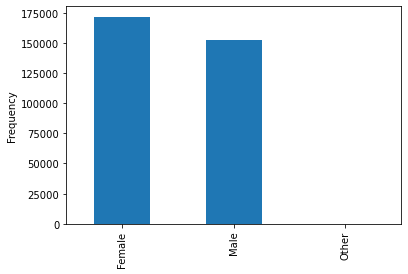

In [13]:
import matplotlib.pyplot as plt
df['sex'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()


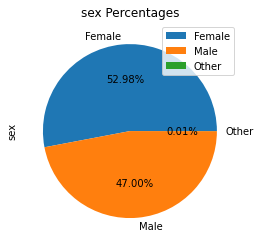

In [14]:
df['sex'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('sex Percentages')
plt.legend()
plt.show()


We can see that the sex feature is imbalanced. But this difference can be caused by a sampling error or bias, in addition to that we have to know that male/female ratio in USA is 0.96 [wikipedia](https://en.wikipedia.org/wiki/Demographics_of_the_United_States). Also maybe the females are more likely to be infected with covid-19.

### 5.2-  age_group Feature

The distribution of the age_group values is described in the figure below:

In [15]:
df['age_group'].value_counts().sort_index()


0 - 9 Years      10418
10 - 19 Years    30490
20 - 29 Years    56471
30 - 39 Years    48026
40 - 49 Years    47768
50 - 59 Years    49364
60 - 69 Years    38966
70 - 79 Years    24499
80+ Years        18385
Name: age_group, dtype: int64

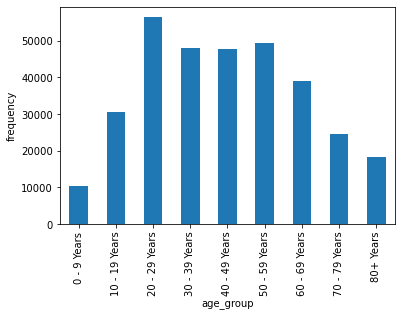

In [16]:
# Histogram
df['age_group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('age_group')
plt.ylabel("frequency")
plt.show()


The distribution above looks to be a normal distribution and it is not similar to the USA population distribution by age which is clarified [here](https://en.wikipedia.org/wiki/Demographics_of_the_United_States#/media/File:USA2020dec1.png). The difference seems to be considerable especially for both the children and the old people, because the frequency of the children in our sample seems to be lower while the frequency of the old people seems to be higher. Many reasons might have caused the mentioned effect, maybe because the old people are more likely to be infected with covid-19, or because they are more likely to have serious symptoms, so they have to go to hospital which means  that their cases are more likely to be confirmed, i.e. they are more likely to appear in our sample.


### 5.3- race and ethnicity (combined) Feature

The distribution of the age_group values is described in the figure below:

In [17]:
df['Race and ethnicity (combined)'].value_counts()


White, Non-Hispanic                                     180088
Hispanic/Latino                                          83114
Black, Non-Hispanic                                      37799
Asian, Non-Hispanic                                      10371
Multiple/Other, Non-Hispanic                              9131
Native Hawaiian/Other Pacific Islander, Non-Hispanic      2479
American Indian/Alaska Native, Non-Hispanic               1405
Name: Race and ethnicity (combined), dtype: int64

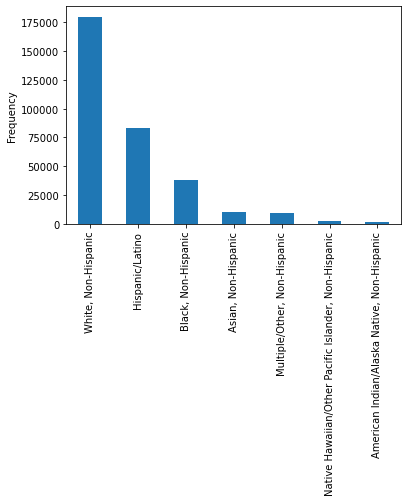

In [18]:
df['Race and ethnicity (combined)'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()


Actually we don't have exact information about the distribution of the races and ethnicity in USA. but this [link](https://statisticalatlas.com/United-States/Race-and-Ethnicity) can tell us some information. From the link we can notice that the biggest three parts of the United States population are: the white people(62%), the Hispanic people (~17%) and the black people (12.6%). Let us check these percentages in our sample.

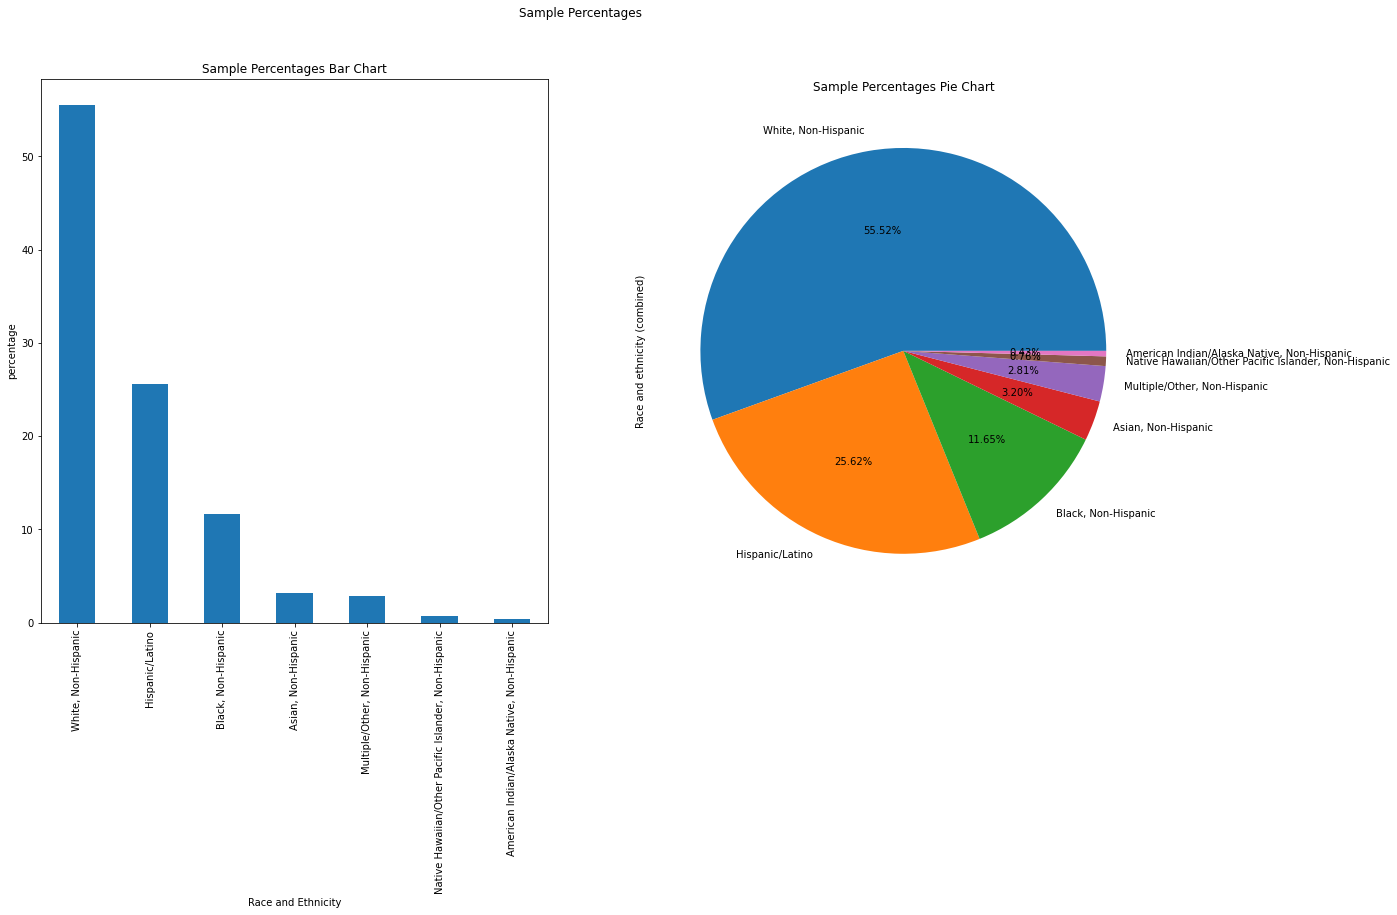

In [19]:
# Here we will show the percentage of each combination of races and ethnicities
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
(100*df['Race and ethnicity (combined)'].value_counts() /
 len(df['Race and ethnicity (combined)'])).plot(kind='bar')
plt.xlabel('Race and Ethnicity')
plt.ylabel('percentage')
plt.title('Sample Percentages Bar Chart')
plt.subplot(1, 2, 2)
df['Race and ethnicity (combined)'].value_counts().plot(
    kind='pie', autopct='%1.2f%%')
plt.title('Sample Percentages Pie Chart')
plt.suptitle('Sample Percentages')
plt.show()


It can be easily noticed that the sample contains more Hispanic/Latino people (almost 26%) than the Hispanic people in the American population, and it contains less white people (almost 56%) than the population, but it contains almost the same percentage of the black people (almost 12%). Maybe the Hispanic/Latino people are more likely and the White Non-Hispanic people are less likely to be infected with covid-19 or get serious symptoms.

### 5.4- hosp_yn Feature 

In [20]:
df['hosp_yn'].value_counts()


No     266854
Yes     57533
Name: hosp_yn, dtype: int64

In [21]:
# Here we will show the percentages
(100*df['hosp_yn'].value_counts()/len(df['hosp_yn']))


No     82.264086
Yes    17.735914
Name: hosp_yn, dtype: float64

In [23]:
# another way to do this
df['hosp_yn'].value_counts(normalize=True)


No     0.822641
Yes    0.177359
Name: hosp_yn, dtype: float64

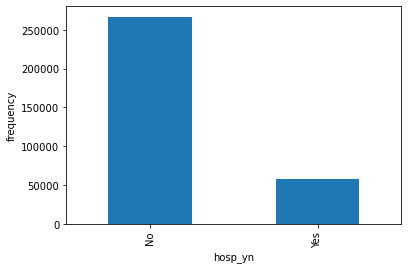

In [24]:
df['hosp_yn'].value_counts().plot(kind='bar')
plt.xlabel('hosp_yn')
plt.ylabel('frequency')
plt.show()


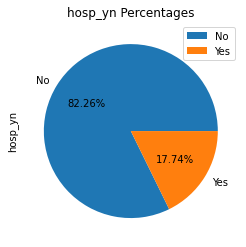

In [26]:
# Here we will show the percentages
df['hosp_yn'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('hosp_yn Percentages')
plt.legend()
plt.show()


From the results above we can see that almost only about 17.7% of the patients of the sample were hospitalized.

### 5.5- icu_yn Feature 

The distribution of the values is described in the figure below:

In [27]:
df['icu_yn'].value_counts()


No     303958
Yes     20429
Name: icu_yn, dtype: int64

In [28]:
# Here we will show the percentages
(100*df['icu_yn'].value_counts()/len(df['icu_yn']))


No     93.702275
Yes     6.297725
Name: icu_yn, dtype: float64

In [30]:
# another way to do this
df['icu_yn'].value_counts(normalize=True)


No     0.937023
Yes    0.062977
Name: icu_yn, dtype: float64

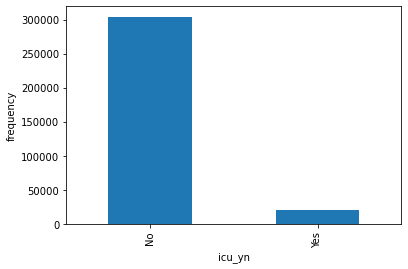

In [31]:
df['icu_yn'].value_counts().plot(kind='bar')
plt.xlabel('icu_yn')
plt.ylabel('frequency')
plt.show()


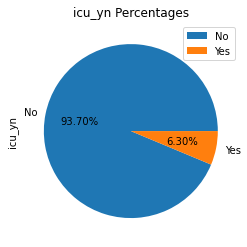

In [32]:
# Here we will plot the percentages
df['icu_yn'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('icu_yn Percentages')
plt.legend()
plt.show()


The results above show that almost about 6.3% of the sample patients were ICU admitted.

### 5.6- death_yn Feature

In [33]:
df['death_yn'].value_counts()


No     305848
Yes     18539
Name: death_yn, dtype: int64

In [34]:
# Here we will show the percentages
(100*df['death_yn'].value_counts()/len(df['death_yn']))


No     94.284913
Yes     5.715087
Name: death_yn, dtype: float64

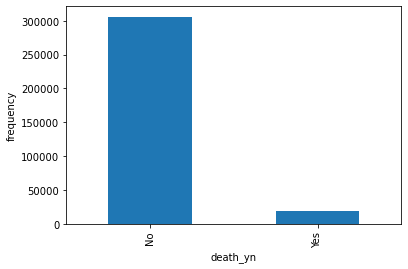

In [37]:
df['death_yn'].value_counts().plot(kind='bar')
plt.xlabel('death_yn')
plt.ylabel('frequency')
plt.show()


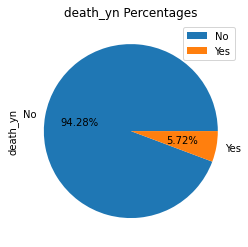

In [36]:
# Here we will plot the percentages
df['death_yn'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('death_yn Percentages')
plt.legend()
plt.show()


The results above show that the mortality rate of the patients in our sample is 5.72%.

### 5.7- medcond_yn Feature

In [38]:
df['medcond_yn'].value_counts()


Yes    178853
No     145534
Name: medcond_yn, dtype: int64

In [39]:
# Here we will show the percentages
(100*df['medcond_yn'].value_counts()/len(df['medcond_yn']))


Yes    55.135687
No     44.864313
Name: medcond_yn, dtype: float64

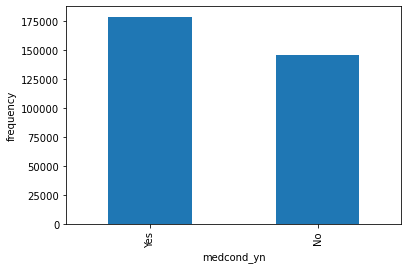

In [40]:
df['medcond_yn'].value_counts().plot(kind='bar')
plt.xlabel('medcond_yn')
plt.ylabel('frequency')
plt.show()


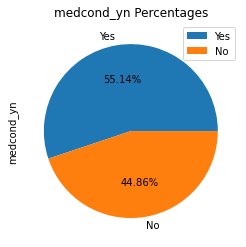

In [41]:
# Here we will plot the percentages
df['medcond_yn'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('medcond_yn Percentages')
plt.legend()
plt.show()


From the results above, we can see that a huge number of the patients in our sample have medical conditions (almost about 55%). Many reasons might have caused this effect: maybe the people who have medical conditions are more likely to be infected, or more likely to have serious symptoms (i.e. They have to go to hospital, which means that their cases are more likely to be confirmed).

## 6- Multivariate Analysis

As our goal is studying the relationships between our features and the mortality rate, in this section we will study only the relationships between death_yn and all the other features. 

In order to simplify the study, we will not study all the other features pairwise relationships.

### 6.1- sex and death_yn

To understand the relationship between the sex and the death_yn which are categorical variables, we have to check the mortality rate depending on each possible value of the sex.

In [42]:
# Filter out the males from our original data frame
temp_female_df = df.loc[df['sex'] == 'Female']
temp_female_df = temp_female_df[['sex', 'death_yn']]

# print the propability mass function of the females death
print("Propability of death PMF For Females:")
print((temp_female_df['death_yn'].value_counts() /
      len(temp_female_df['death_yn'])))
print()

# Filter out the females from our original data frame
temp_male_df = df.loc[df['sex'] == 'Male']
temp_male_df = temp_male_df[['sex', 'death_yn']]

# print the propability mass function of the males death
print("Propability of death PMF For Males:")
print((temp_male_df['death_yn'].value_counts()/len(temp_male_df['death_yn'])))


Propability of death PMF For Females:
No     0.954634
Yes    0.045366
Name: death_yn, dtype: float64

Propability of death PMF For Males:
No     0.92955
Yes    0.07045
Name: death_yn, dtype: float64


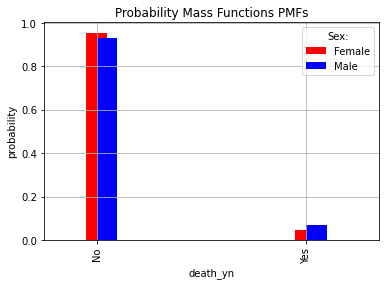

In [43]:
# plot the propability mass function of the males and females death
(temp_female_df['death_yn'].value_counts()/len(temp_female_df['death_yn'])).plot(
    kind='bar', align='center', width=0.1, color='red', legend='Female', label='Female')
(temp_male_df['death_yn'].value_counts()/len(temp_male_df['death_yn'])).plot(
    kind='bar', align='edge', width=0.1, color='blue', legend='Male', label='Male')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title="Sex:")
plt.grid()
plt.show()


From the results above, we can see that even though that the females have appeared more in our sample, they might have a lower mortality rate.

### 6.2- age_group  and death_yn

To understand the relationship between the age_group and the death_yn which are category variables, we have to check the mortality rate depending on each possible value of the age_group.

In [44]:
# get the age group [0,9] from our original data frame
temp_zero_to_nine_df = df.loc[df['age_group'] == '0 - 9 Years']
temp_zero_to_nine_df = temp_zero_to_nine_df[['age_group', 'death_yn']]
# print the death propability mass function of the age group [0,9]
print("Propability of death PMF For age group [0,9]:")
print((temp_zero_to_nine_df['death_yn'].value_counts(
)/len(temp_zero_to_nine_df['death_yn'])))
print()

# get the age group [10,19] from our original data frame
temp_ten_to_nineteen_df = df.loc[df['age_group'] == '10 - 19 Years']
temp_ten_to_nineteen_df = temp_ten_to_nineteen_df[['age_group', 'death_yn']]
# print the death propability mass function of the age group [10,19]
print("Propability of death PMF For age group [10,19]:")
print((temp_ten_to_nineteen_df['death_yn'].value_counts(
)/len(temp_ten_to_nineteen_df['death_yn'])))
print()

# get the age group [20,29] from our original data frame
temp_twenty_to_twenty_nine_df = df.loc[df['age_group'] == '20 - 29 Years']
temp_twenty_to_twenty_nine_df = temp_twenty_to_twenty_nine_df[[
    'age_group', 'death_yn']]
# print the death propability mass function of the age group [20,29]
print("Propability of death PMF For age group [20,29]:")
print((temp_twenty_to_twenty_nine_df['death_yn'].value_counts(
)/len(temp_twenty_to_twenty_nine_df['death_yn'])))
print()

# get the age group [30,39] from our original data frame
temp_thirty_to_thirty_nine_df = df.loc[df['age_group'] == '30 - 39 Years']
temp_thirty_to_thirty_nine_df = temp_thirty_to_thirty_nine_df[[
    'age_group', 'death_yn']]
# print the death propability mass function of the age group [30,39]
print("Propability of death PMF For age group [30,39]:")
print((temp_thirty_to_thirty_nine_df['death_yn'].value_counts(
)/len(temp_thirty_to_thirty_nine_df['death_yn'])))
print()

# get the age group [40,49] from our original data frame
temp_fourty_to_fourty_nine_df = df.loc[df['age_group'] == '40 - 49 Years']
temp_fourty_to_fourty_nine_df = temp_fourty_to_fourty_nine_df[[
    'age_group', 'death_yn']]
# print the death propability mass function of the age group [40,49]
print("Propability of death PMF For age group [40,49]:")
print((temp_fourty_to_fourty_nine_df['death_yn'].value_counts(
)/len(temp_fourty_to_fourty_nine_df['death_yn'])))
print()

# get the age group [50,59] from our original data frame
temp_fifty_to_fifty_nine_df = df.loc[df['age_group'] == '50 - 59 Years']
temp_fifty_to_fifty_nine_df = temp_fifty_to_fifty_nine_df[[
    'age_group', 'death_yn']]
# print the death propability mass function of the age group [50,59]
print("Propability of death PMF For age group [50,59]:")
print((temp_fifty_to_fifty_nine_df['death_yn'].value_counts(
)/len(temp_fifty_to_fifty_nine_df['death_yn'])))
print()

# get the age group [60,69] from our original data frame
temp_sixty_to_sixty_nine_df = df.loc[df['age_group'] == '60 - 69 Years']
temp_sixty_to_sixty_nine_df = temp_sixty_to_sixty_nine_df[[
    'age_group', 'death_yn']]
# print the death propability mass function of the age group [60,69]
print("Propability of death PMF For age group [60,69]:")
print((temp_sixty_to_sixty_nine_df['death_yn'].value_counts(
)/len(temp_sixty_to_sixty_nine_df['death_yn'])))
print()

# get the age group [70,79] from our original data frame
temp_seventy_to_seventy_nine_df = df.loc[df['age_group'] == '70 - 79 Years']
temp_seventy_to_seventy_nine_df = temp_seventy_to_seventy_nine_df[[
    'age_group', 'death_yn']]
# print the death propability mass function of the age group [70,79]
print("Propability of death PMF For age group [70,79]:")
print((temp_seventy_to_seventy_nine_df['death_yn'].value_counts(
)/len(temp_seventy_to_seventy_nine_df['death_yn'])))
print()

# get the age group 80+ from our original data frame
temp_eighty_plus_df = df.loc[df['age_group'] == '80+ Years']
temp_eighty_plus_df = temp_eighty_plus_df[['age_group', 'death_yn']]
# print the death propability mass function of the age group 80+
print("Propability of death PMF For age group 80+:")
print((temp_eighty_plus_df['death_yn'].value_counts() /
      len(temp_eighty_plus_df['death_yn'])))
print()


Propability of death PMF For age group [0,9]:
No     0.998656
Yes    0.001344
Name: death_yn, dtype: float64

Propability of death PMF For age group [10,19]:
No     0.998983
Yes    0.001017
Name: death_yn, dtype: float64

Propability of death PMF For age group [20,29]:
No     0.997981
Yes    0.002019
Name: death_yn, dtype: float64

Propability of death PMF For age group [30,39]:
No     0.993295
Yes    0.006705
Name: death_yn, dtype: float64

Propability of death PMF For age group [40,49]:
No     0.983692
Yes    0.016308
Name: death_yn, dtype: float64

Propability of death PMF For age group [50,59]:
No     0.957763
Yes    0.042237
Name: death_yn, dtype: float64

Propability of death PMF For age group [60,69]:
No     0.902684
Yes    0.097316
Name: death_yn, dtype: float64

Propability of death PMF For age group [70,79]:
No     0.809666
Yes    0.190334
Name: death_yn, dtype: float64

Propability of death PMF For age group 80+:
No     0.633451
Yes    0.366549
Name: death_yn, dtype: float64

From the results above we can see that the mortality rate increses by increasing the the age. So let us draw the mortality rate (probability of death) by age group in our sample.

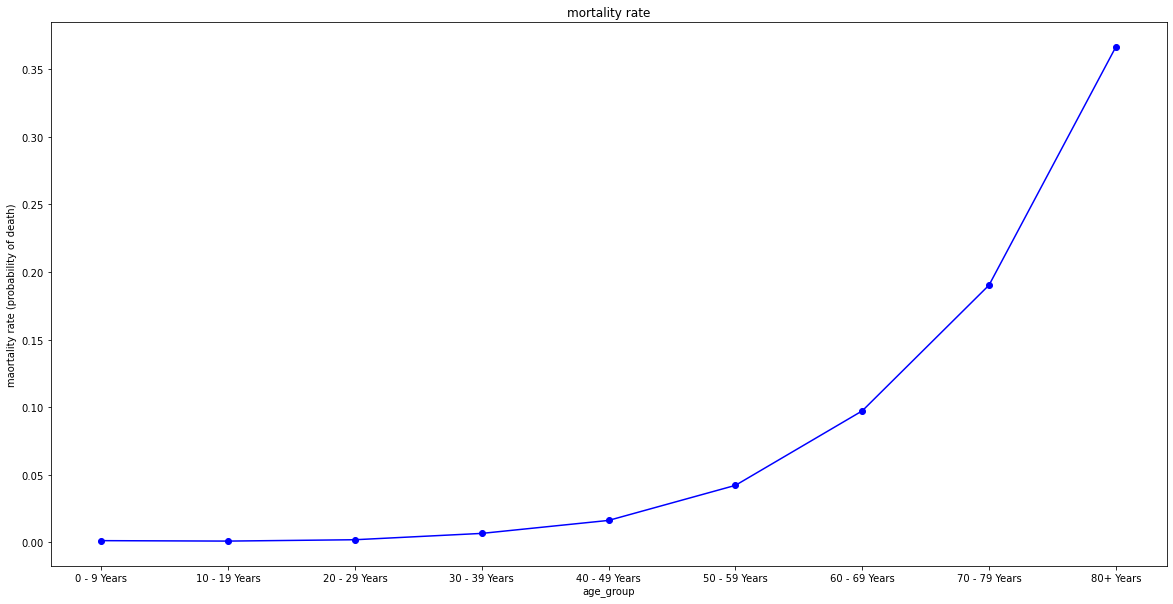

In [45]:
import numpy as np
age_groups_values_counts = df['age_group'].value_counts().sort_index()
age_groups = age_groups_values_counts.index
mortality_rate = np.ndarray(shape=(9, 1), dtype=float)
mortality_rate[0] = temp_zero_to_nine_df['death_yn'].value_counts(
)['Yes']/len(temp_zero_to_nine_df['death_yn'])
mortality_rate[1] = temp_ten_to_nineteen_df['death_yn'].value_counts(
)['Yes']/len(temp_ten_to_nineteen_df['death_yn'])
mortality_rate[2] = temp_twenty_to_twenty_nine_df['death_yn'].value_counts(
)['Yes']/len(temp_twenty_to_twenty_nine_df['death_yn'])
mortality_rate[3] = temp_thirty_to_thirty_nine_df['death_yn'].value_counts(
)['Yes']/len(temp_thirty_to_thirty_nine_df['death_yn'])
mortality_rate[4] = temp_fourty_to_fourty_nine_df['death_yn'].value_counts(
)['Yes']/len(temp_fourty_to_fourty_nine_df['death_yn'])
mortality_rate[5] = temp_fifty_to_fifty_nine_df['death_yn'].value_counts(
)['Yes']/len(temp_fifty_to_fifty_nine_df['death_yn'])
mortality_rate[6] = temp_sixty_to_sixty_nine_df['death_yn'].value_counts(
)['Yes']/len(temp_sixty_to_sixty_nine_df['death_yn'])
mortality_rate[7] = temp_seventy_to_seventy_nine_df['death_yn'].value_counts(
)['Yes']/len(temp_seventy_to_seventy_nine_df['death_yn'])
mortality_rate[8] = temp_eighty_plus_df['death_yn'].value_counts(
)['Yes']/len(temp_eighty_plus_df['death_yn'])
plt.figure(figsize=(20, 10))
plt.plot(age_groups, mortality_rate, 'o-b')
plt.ylabel('maortality rate (probability of death)')
plt.xlabel('age_group')
plt.title('mortality rate')
plt.show()


From the figure above we can see that the mortality rate curve is almost flattened for the young ages, but for the older patients (starting from the '40-49 years' slice) the mortality rate increase exponentially.

### 6.3- Race and ethnicity (combined) vs death_yn

In this section we will plot the mortality rate by race and ethnicity group:

In [46]:
# get the 'White, Non-Hispanic' from our original data frame
temp_white_df = df.loc[df['Race and ethnicity (combined)']
                       == 'White, Non-Hispanic']
temp_white_df = temp_white_df[['Race and ethnicity (combined)', 'death_yn']]
# print the death propability mass function of the 'White, Non-Hispanic'
print("Propability of death PMF for 'White, Non-Hispanic':")
print((temp_white_df['death_yn'].value_counts() /
      len(temp_white_df['death_yn'])))
print()

# get the 'Hispanic/Latino' from our original data frame
temp_hispanic_df = df.loc[df['Race and ethnicity (combined)']
                          == 'Hispanic/Latino']
temp_hispanic_df = temp_hispanic_df[[
    'Race and ethnicity (combined)', 'death_yn']]
# print the death propability mass function of the 'Hispanic/Latino'
print("Propability of death PMF for 'Hispanic/Latino':")
print((temp_hispanic_df['death_yn'].value_counts() /
      len(temp_hispanic_df['death_yn'])))
print()

# get the 'Black, Non-Hispanic' from our original data frame
temp_black_df = df.loc[df['Race and ethnicity (combined)']
                       == 'Black, Non-Hispanic']
temp_black_df = temp_black_df[['Race and ethnicity (combined)', 'death_yn']]
# print the death propability mass function of the 'Black, Non-Hispanic'
print("Propability of death PMF for 'Black, Non-Hispanic':")
print((temp_black_df['death_yn'].value_counts() /
      len(temp_black_df['death_yn'])))
print()

# get the 'Asian, Non-Hispanic' from our original data frame
temp_asian_df = df.loc[df['Race and ethnicity (combined)']
                       == 'Asian, Non-Hispanic']
temp_asian_df = temp_asian_df[['Race and ethnicity (combined)', 'death_yn']]
# print the death propability mass function of the 'Asian, Non-Hispanic'
print("Propability of death PMF for 'Asian, Non-Hispanic':")
print((temp_asian_df['death_yn'].value_counts() /
      len(temp_asian_df['death_yn'])))
print()

# get the 'Multiple/Other, Non-Hispanic' from our original data frame
temp_other_df = df.loc[df['Race and ethnicity (combined)']
                       == 'Multiple/Other, Non-Hispanic']
temp_other_df = temp_other_df[['Race and ethnicity (combined)', 'death_yn']]
# print the death propability mass function of the 'Multiple/Other, Non-Hispanic'
print("Propability of death PMF for 'Multiple/Other, Non-Hispanic':")
print((temp_other_df['death_yn'].value_counts() /
      len(temp_other_df['death_yn'])))
print()

# get the 'Native Hawaiian/Other Pacific Islander, Non-Hispanic' from our original data frame
temp_native_df = df.loc[df['Race and ethnicity (combined)']
                        == 'Native Hawaiian/Other Pacific Islander, Non-Hispanic']
temp_native_df = temp_native_df[['Race and ethnicity (combined)', 'death_yn']]
# print the death propability mass function of the 'Native Hawaiian/Other Pacific Islander, Non-Hispanic'
print("Propability of death PMF for 'Native Hawaiian/Other Pacific Islander, Non-Hispanic':")
print((temp_native_df['death_yn'].value_counts() /
      len(temp_native_df['death_yn'])))
print()

# get the 'American Indian/Alaska Native, Non-Hispanic' from our original data frame
temp_american_indian_df = df.loc[df['Race and ethnicity (combined)']
                                 == 'American Indian/Alaska Native, Non-Hispanic']
temp_american_indian_df = temp_american_indian_df[[
    'Race and ethnicity (combined)', 'death_yn']]
# print the death propability mass function of the 'American Indian/Alaska Native, Non-Hispanic'
print("Propability of death PMF for 'American Indian/Alaska Native, Non-Hispanic':")
print((temp_american_indian_df['death_yn'].value_counts(
)/len(temp_american_indian_df['death_yn'])))
print()

print(df['Race and ethnicity (combined)'].value_counts())


Propability of death PMF for 'White, Non-Hispanic':
No     0.942411
Yes    0.057589
Name: death_yn, dtype: float64

Propability of death PMF for 'Hispanic/Latino':
No     0.963857
Yes    0.036143
Name: death_yn, dtype: float64

Propability of death PMF for 'Black, Non-Hispanic':
No     0.909812
Yes    0.090188
Name: death_yn, dtype: float64

Propability of death PMF for 'Asian, Non-Hispanic':
No     0.92373
Yes    0.07627
Name: death_yn, dtype: float64

Propability of death PMF for 'Multiple/Other, Non-Hispanic':
No     0.919615
Yes    0.080385
Name: death_yn, dtype: float64

Propability of death PMF for 'Native Hawaiian/Other Pacific Islander, Non-Hispanic':
No     0.961275
Yes    0.038725
Name: death_yn, dtype: float64

Propability of death PMF for 'American Indian/Alaska Native, Non-Hispanic':
No     0.904626
Yes    0.095374
Name: death_yn, dtype: float64

White, Non-Hispanic                                     180088
Hispanic/Latino                                          83114
Bl

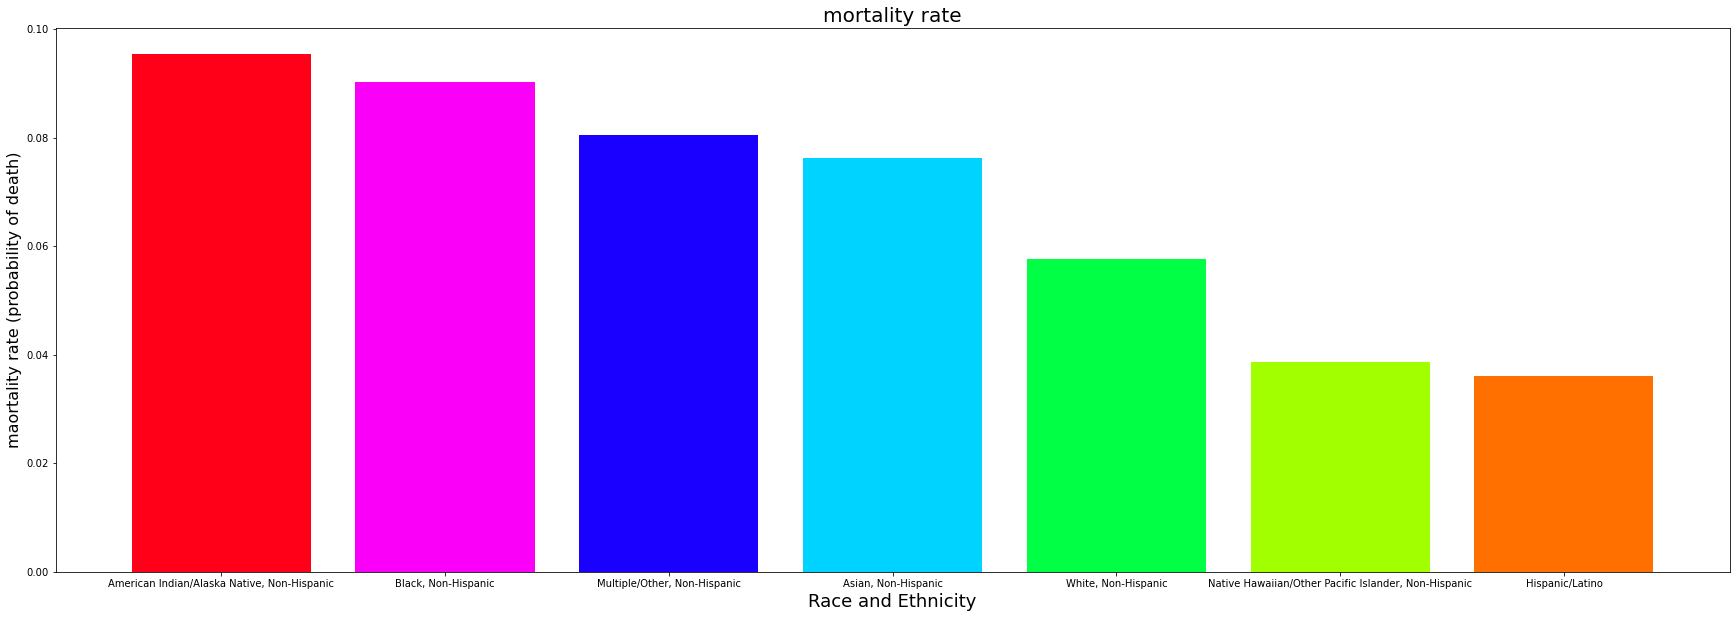

In [49]:
from matplotlib import cm
race_and_ethnicity_values_counts = df['Race and ethnicity (combined)'].value_counts(
)
race_and_ethnicities = race_and_ethnicity_values_counts.index
mortality_rate = np.ndarray(shape=(7), dtype=float)
mortality_rate[0] = temp_white_df['death_yn'].value_counts()[
    'Yes']/len(temp_white_df['death_yn'])
mortality_rate[1] = temp_hispanic_df['death_yn'].value_counts()[
    'Yes']/len(temp_hispanic_df['death_yn'])
mortality_rate[2] = temp_black_df['death_yn'].value_counts()[
    'Yes']/len(temp_black_df['death_yn'])
mortality_rate[3] = temp_asian_df['death_yn'].value_counts()[
    'Yes']/len(temp_asian_df['death_yn'])
mortality_rate[4] = temp_other_df['death_yn'].value_counts()[
    'Yes']/len(temp_other_df['death_yn'])
mortality_rate[5] = temp_native_df['death_yn'].value_counts()[
    'Yes']/len(temp_native_df['death_yn'])
mortality_rate[6] = temp_american_indian_df['death_yn'].value_counts(
)['Yes']/len(temp_american_indian_df['death_yn'])
temp_df = pd.DataFrame(data=[np.array(race_and_ethnicities), mortality_rate], index=[
                       'race_and_ethnicity', 'mortality_rate'])
temp_df = temp_df.T
temp_df = temp_df.sort_values('mortality_rate', ascending=False)
plt.figure(figsize=(30, 10))
y = np.array([13, 11, 9, 7, 5, 3, 1])
colors = cm.hsv(y / float(max(y)))
plt.bar(temp_df['race_and_ethnicity'], temp_df['mortality_rate'], color=colors)
plt.ylabel('maortality rate (probability of death)', fontsize=16)
plt.xlabel('Race and Ethnicity', fontsize=18)
plt.title('mortality rate', fontsize=20)
plt.show()


Apparently, the figure above tells us that the "American Indian/Alaska Native, Non-Hispanic" and the "Black Non-Hispanic" have a higher mortality rate than the others. Also it tells us that the "Hispanic/ Latino" group has the lowest mortality rate in our sample.

### 6.4- hosp_yn  and death_yn

To understand the relationship between the hosp_yn and the death_yn which are Boolean variables, we will check the mortality rate depending on the values of the hosp_yn.

In [50]:
# Filter out the non-hospitalized from our original data frame
temp_hospitalized_df = df.loc[df['hosp_yn'] == 'Yes']
temp_hospitalized_df = temp_hospitalized_df[['hosp_yn', 'death_yn']]

# print the death propability mass function of the hospitalized patients
print("Propability of death PMF For hospitalized patient:")
print((temp_hospitalized_df['death_yn'].value_counts(
)/len(temp_hospitalized_df['death_yn'])))
print()

# Filter out the hospitalized from our original data frame
temp_nonhospitalized_df = df.loc[df['hosp_yn'] == 'No']
temp_nonhospitalized_df = temp_nonhospitalized_df[['hosp_yn', 'death_yn']]

# print the propability mass function of the males death
print("Propability of death PMF For non-hospitalized patient:")
print((temp_nonhospitalized_df['death_yn'].value_counts(
)/len(temp_nonhospitalized_df['death_yn'])))


Propability of death PMF For hospitalized patient:
No     0.721238
Yes    0.278762
Name: death_yn, dtype: float64

Propability of death PMF For non-hospitalized patient:
No     0.990628
Yes    0.009372
Name: death_yn, dtype: float64


From the results above the mortality rate of the hospitalized patients is very high ~28%, while it less than 1% for the non-hospitalized ones. This result can be clarified in the bar plot below:

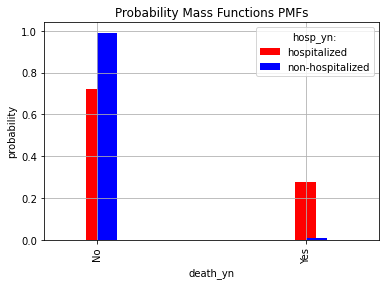

In [51]:
# plot the death propability mass function of the hospitalized and non-hospitalized patients.
(temp_hospitalized_df['death_yn'].value_counts()/len(temp_hospitalized_df['death_yn'])).plot(
    kind='bar', align='center', width=0.1, color='red', legend='hospitalized', label='hospitalized')
(temp_nonhospitalized_df['death_yn'].value_counts()/len(temp_nonhospitalized_df['death_yn'])).plot(
    kind='bar', align='edge', width=0.1, color='blue', legend='non-hospitalized', label='non-hospitalized')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title="hosp_yn:")
plt.grid()
plt.show()


The result above tells us that the patients who don't need to be hospitalized might be less likely to die. That could be because that most the patients who die might have serious symptoms requires the hospitalization.

### 6.5- icu_yn  and death_yn

To understand the relationship between the icu_yn and the death_yn which are Boolean variables, we will check the mortality rate depending on the values of the icu_yn.

In [52]:
# Filter out the icu_yn=No from our original data frame
temp_icu_yes_df = df.loc[df['icu_yn'] == 'Yes']
temp_icu_yes_df = temp_icu_yes_df[['icu_yn', 'death_yn']]

# print the death propability mass function of the ICUed patients
print("Propability of death PMF For hospitalized patient:")
print((temp_icu_yes_df['death_yn'].value_counts() /
      len(temp_icu_yes_df['death_yn'])))
print()

# Filter out the icu_yn=Yes from our original data frame
temp_icu_no_df = df.loc[df['icu_yn'] == 'No']
temp_icu_no_df = temp_icu_no_df[['icu_yn', 'death_yn']]

# print the propability mass function of the icu_yn=no death
print("Propability of death PMF For non-hospitalized patient:")
print((temp_icu_no_df['death_yn'].value_counts() /
      len(temp_icu_no_df['death_yn'])))


Propability of death PMF For hospitalized patient:
Yes    0.518723
No     0.481277
Name: death_yn, dtype: float64

Propability of death PMF For non-hospitalized patient:
No     0.973871
Yes    0.026129
Name: death_yn, dtype: float64


From the results above the mortality rate of the patients that have been admitted to ICU is very high ~52%, while it is less than 3% for the non-admitted ones. This result can be clarified in the bar plot below:

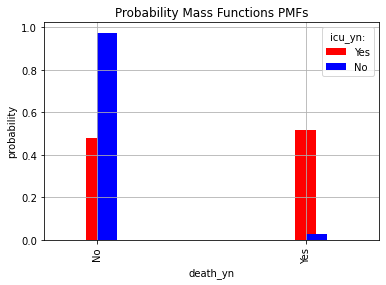

In [53]:
# plot the death propability mass function of the icu_yn=Yes and icu_yn=No patients.
(temp_icu_yes_df['death_yn'].value_counts().sort_index()/len(temp_icu_yes_df['death_yn'])
 ).plot(kind='bar', align='center', width=0.1, color='red', legend='Yes', label='Yes')
(temp_icu_no_df['death_yn'].value_counts().sort_index()/len(temp_icu_no_df['death_yn'])
 ).plot(kind='bar', align='edge', width=0.1, color='blue', legend='No', label='No')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title="icu_yn:")
plt.grid()
plt.show()


### 6.6- medcond_yn and death_yn

In [54]:
# Filter out the patients who don't have medical conditions from our original data frame
temp_medcond_yes_df = df.loc[df['medcond_yn'] == 'Yes']
temp_medcond_yes_df = temp_medcond_yes_df[['medcond_yn', 'death_yn']]
# print the death propability mass function of the patients who have medical conditions.
print("Propability of death PMF for patients who have medical conditions:")
print((temp_medcond_yes_df['death_yn'].value_counts() /
      len(temp_medcond_yes_df['death_yn'])))
print()

# Filter out the patients who have medical conditions from our original data frame
temp_medcond_no_df = df.loc[df['medcond_yn'] == 'No']
temp_medcond_no_df = temp_medcond_no_df[['icu_yn', 'death_yn']]

# print the death propability mass function of the patients who don't have medical conditions.
print("Propability of death PMF for patients who don't have medical conditions:")
print((temp_medcond_no_df['death_yn'].value_counts() /
      len(temp_medcond_no_df['death_yn'])))


Propability of death PMF for patients who have medical conditions:
No     0.904726
Yes    0.095274
Name: death_yn, dtype: float64

Propability of death PMF for patients who don't have medical conditions:
No     0.9897
Yes    0.0103
Name: death_yn, dtype: float64


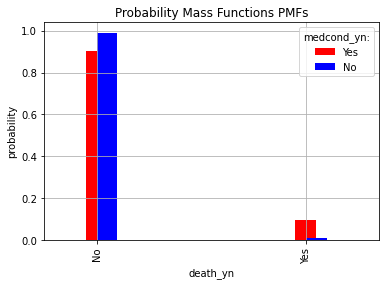

In [55]:
# plot the death propability mass function of the patients who have and who don't have medical conditions .
(temp_medcond_yes_df['death_yn'].value_counts().sort_index()/len(temp_medcond_yes_df['death_yn'])
 ).plot(kind='bar', align='center', width=0.1, color='red', legend='Yes', label='Yes')
(temp_medcond_no_df['death_yn'].value_counts().sort_index()/len(temp_medcond_no_df['death_yn'])
 ).plot(kind='bar', align='edge', width=0.1, color='blue', legend='No', label='No')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title="medcond_yn:")
plt.grid()
plt.show()


The result above tells us that the patients who don't have medical conditions might be less likely to die. 

## 7- Conclusion

This report concludes that the mortality rate is significantly related to the age, sex, race and ethnicity, patient hospitalization and patient admission to ICU.